# **IMPLEMENTATION OF DBSCAN**

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/Mall_Customers.csv"

dataset=pd.read_csv(file_path)
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

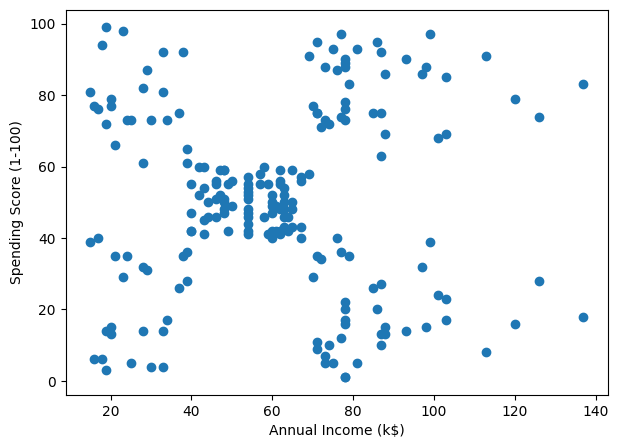

In [15]:
plt.figure(figsize=(7, 5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [16]:
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(X_scaled)

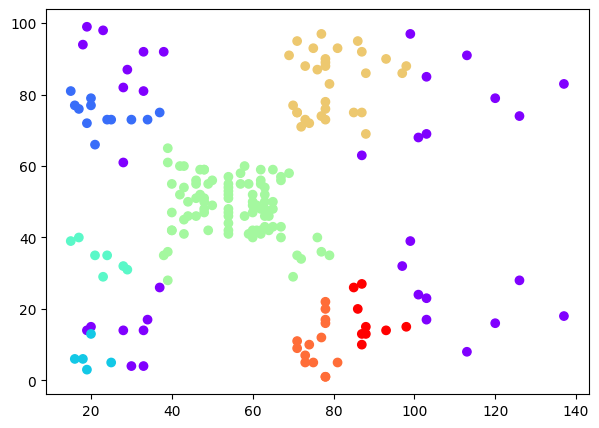

In [17]:
plt.figure(figsize=(7,5))

# All points colored by cluster
plt.scatter(
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=clusters,
    cmap='rainbow'
)

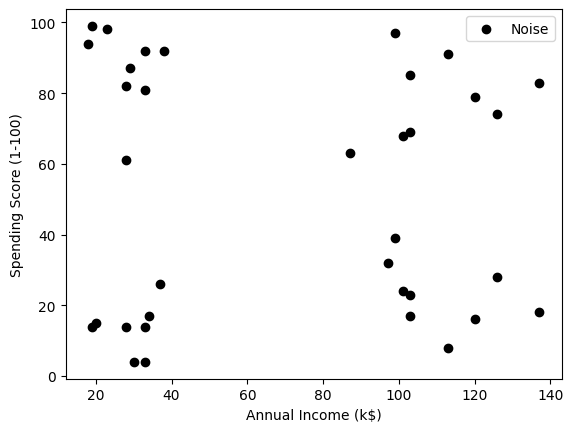

In [18]:
# Noise points (cluster = -1)
plt.scatter(
    X.iloc[clusters == -1]['Annual Income (k$)'],
    X.iloc[clusters == -1]['Spending Score (1-100)'],
    color='black',
    label='Noise'
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

# remove noise points (-1)
filtered_data = X_scaled[clusters != -1]
filtered_labels = clusters[clusters != -1]

score = silhouette_score(filtered_data, filtered_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5243276105881419


In [20]:
eps_value = [0.2, 0.3, 0.5]

for eps in eps_value:
    print(f"\n Evaluating DBSCAN using eps={eps}")

    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)

    # Number of Clusters (Ignore Noise label -1)
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

    # Number of Noise Points
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)
    print(f"Number of Clusters: {n_clusters}")
    print(f"Number of Noise Points: {n_noise} ({noise_ratio * 100:.2f}%)")
    # Silhouette score (only if valid)
    if n_clusters > 1:
        X_non_noise = X_scaled[labels != -1]
        labels_non_noise = labels[labels != -1]
        score = silhouette_score(X_non_noise, labels_non_noise)
        print("Silhouette score:", round(score, 3))
    else:
        print("Silhouette score: Not applicable")


 Evaluating DBSCAN using eps=0.2
Number of Clusters: 7
Number of Noise Points: 77 (38.50%)
Silhouette score: 0.586

 Evaluating DBSCAN using eps=0.3
Number of Clusters: 7
Number of Noise Points: 35 (17.50%)
Silhouette score: 0.524

 Evaluating DBSCAN using eps=0.5
Number of Clusters: 2
Number of Noise Points: 8 (4.00%)
Silhouette score: 0.388
